In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x[0]**2+50*x[1]**2

def g(x):
    return np.array([2*x[0],100*x[1]])

# 函数的上帝视角和每一处的梯度

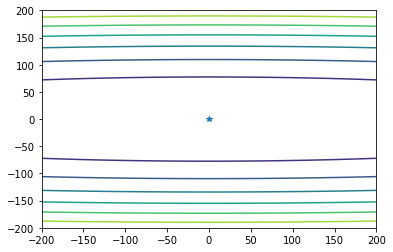

In [26]:
x = np.linspace(-200,200,1000)
y = np.linspace(-200,200,1000)
X, Y = np.meshgrid(x,y)
Z = X**2+50*Y**2

def contour(X,Y,Z,arr=None):
    plt.contour(X,Y,Z)
    plt.plot(0,0,marker='*')
    
    if arr is not None:
        arr = np.array(arr)
        for i in range(len(arr)-1):
            plt.plot(arr[i:i+2,0],arr[i:i+2,1])
               
contour(X,Y,Z,arr=None)

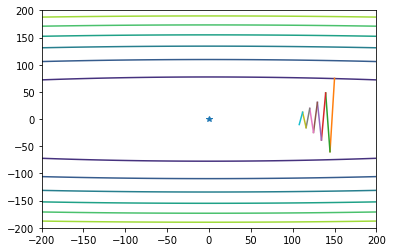

In [50]:
# 普通gradient descent
def gd(x_start,step,epoch,g,printf):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    for i in range(epoch-1):
        grad = g(x)
        x -= step*grad
        passing_dot.append(x.copy())
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = gd(x_start=[150,75],step=0.018,epoch=10,g=g,printf=False)
contour(X,Y,Z,arr)

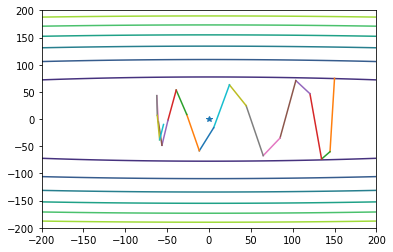

In [60]:
# gradient descent with momentum
def gdm(x_start,step,epoch,g,printf,discount):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch-1):
        grad = g(x)
        pre_grad = pre_grad*discount+grad
        x -= step*pre_grad
        passing_dot.append(x.copy())
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = gdm(x_start=[150,75],step=0.018,epoch=20,g=g,printf=False,discount=0.9)
contour(X,Y,Z,arr)

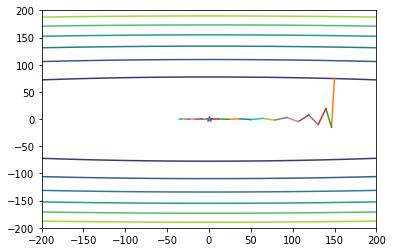

In [61]:
# Nesterov AG
def nag(x_start,step,epoch,g,printf,discount):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch-1):
        x_future = x - step*discount*pre_grad
        grad = g(x_future)
        pre_grad = pre_grad*discount+grad
        x -= step*pre_grad
        passing_dot.append(x.copy())
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = nag(x_start=[150,75],step=0.012,epoch=20,g=g,printf=False,discount=0.9)
contour(X,Y,Z,arr)

Epoch 0 grad=[ 180. 1500.] x=[90. 15.]
Epoch 1 grad=[118.03226646 317.6048662 ] x=[59.01613323  3.17604866]
Epoch 2 grad=[79.37075307 66.20828074] x=[39.68537653  0.66208281]
Epoch 3 grad=[53.84007009 13.5398708 ] x=[26.92003505  0.13539871]
Epoch 4 grad=[36.61468797  2.71471607] x=[18.30734398  0.02714716]
Epoch 5 grad=[24.89757126  0.53336092] x=[1.24487856e+01 5.33360915e-03]
Epoch 6 grad=[16.90769584  0.10263048] x=[8.45384792e+00 1.02630484e-03]
Epoch 7 grad=[11.46013752  0.01933084] x=[5.73006876e+00 1.93308396e-04]
Epoch 8 grad=[7.75092153e+00 3.56199437e-03] x=[3.87546076e+00 3.56199437e-05]


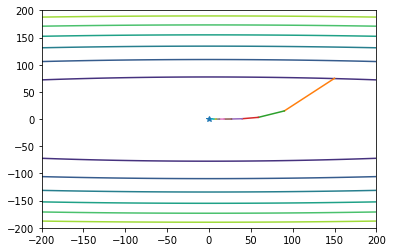

In [72]:
# rmsprop/adagrad
def rmsprop(x_start,step,epoch,g,printf,decay_rate):
    x = np.array(x_start,dtype='float64')
    passing_dot = [x.copy()]
    cache = np.array([0,0])
    for i in range(epoch-1):
        cache = decay_rate*cache+(1-decay_rate)*g(x)**2
        x -= step*g(x)/np.sqrt(cache+1e-8)
        passing_dot.append(x.copy())
        grad = g(x)
        if printf:
            print(f'Epoch {i} grad={grad} x={x}')
    return x,passing_dot

result, arr = rmsprop(x_start=[150,75],step=6,epoch=10,g=g,printf=True,decay_rate=0.99)
contour(X,Y,Z,arr)

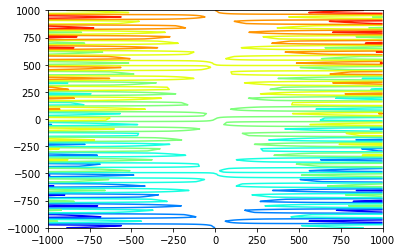

In [86]:
x = np.linspace(-1000,1000,100)
y = np.linspace(-1000,1000,100)
X, Y = np.meshgrid(x,y)
Z = X*np.cos(Y)+Y
plt.contour(X,Y,Z,cmap="jet")